
# London's underground resilience

## Preprocessing

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from networkx import algorithms 
from networkx.algorithms import efficiency
from networkx.algorithms import components
from networkx.algorithms.efficiency_measures import global_efficiency
from networkx.algorithms.components import connected_components

In [2]:
#read the shape file for London's underground
os.chdir('.\\Underground')
g_shp=nx.read_shp('underground.shp',geom_attrs=False) 

In [3]:
#give to the nodes the names of the stations:
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}
nod_all = {**nod_st1, **nod_st2}
nx.set_node_attributes(g_shp,nod_all,'station')

#transform the type of graph from directed to undirected 
g_shp_un = g_shp.to_undirected()

list((g_shp_un.edges(data=True)))[0]

((-0.1571, 51.5226),
 (-0.1631, 51.5225),
 {'toid_seq': '1',
  'station_1': 11,
  'station_1_': 'Baker Street',
  'station_2': 163,
  'station_2_': 'Marylebone',
  'distance': 416.586050414,
  'ShpName': 'underground'})

## Nodes importance evaluation based on Centrality

In this part, we will evaluate nodes importance by calculating their centrality. We will use three centreality measures to calculate and check the most 10 important stations following two stratigies: sequential and non-sequential.

Therefore, there will be 6 different scenarios for nodes importance.

   * Scenario 1: Importance based on non-sequentially Betweenness Centrality value
   * Scenario 2: Importance based on non-sequentially Closeness Centrality value
   * Scenario 3: Importance based on non-sequentially Degree Centrality value
   * Scenario 4: Importance based on sequentially Betweenness Centrality value
   * Scenario 5: Importance based on sequentially Closeness Centrality value
   * Scenario 6: Importance based on sequentially Degree Centrality value

### Betweenness Centrality



In [4]:
# calculate the values
bet_london_w=nx.betweenness_centrality(g_shp_un
                                       #, weight='distance'
                                       , normalized=False)
# add these values to the nodes attributes:
nx.set_node_attributes(g_shp_un,bet_london_w,'betweenness_w')

In [5]:
# Scenario 1
betweenness_df=pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')
max_1=list(betweenness_df.sort_values('betweenness_w',axis = 0,ascending = False).index)[0:10]

betweenness_df.sort_values('betweenness_w',axis = 0,ascending = False)

,betweenness_w
"(-0.1428, 51.5067)",16399.698810
"(-0.1143, 51.5036)",15644.492857
"(-0.0886, 51.5133)",15008.035714
"(-0.1571, 51.5226)",14441.576984
"(-0.1254, 51.501)",14139.401190
...,...
"(-0.275, 51.6137)",0.000000
"(-0.4376, 51.5696)",0.000000
"(0.251, 51.559)",0.000000
"(-0.3351, 51.5925)",0.000000


In [6]:
# Scenario 4

max_4=[]
g_4=g_shp_un.copy()

for i in range(0,10):
    # recalculate the centrality values and remove the most largest one
    bet_london_w=nx.betweenness_centrality(g_4
                                           #, weight='distance'
                                           , normalized=False)
    nx.set_node_attributes(g_4,bet_london_w,'betweenness_w')
    betweenness_df=pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')
    node4=list(betweenness_df.sort_values('betweenness_w',axis = 0,ascending = False).index)
    max_4.append(node4[0])
    g_4.remove_nodes_from([node4[0]])

### Closeness Centrality

In [7]:
closeness_w=nx.closeness_centrality(g_shp_un
                                    #,distance='distance'
                                   )
nx.set_node_attributes(g_shp_un,closeness_w,'closeness_w')

In [8]:
# Scenario 2
closeness_df=pd.DataFrame.from_dict(closeness_w,columns=['closeness_w'],orient='index')
max_2=list(closeness_df.sort_values('closeness_w',axis = 0,ascending = False).index)[0:10]

closeness_df.sort_values('closeness_w',axis = 0,ascending = False)

,closeness_w
"(-0.1428, 51.5067)",0.115487
"(-0.1254, 51.501)",0.112463
"(-0.1494, 51.5142)",0.111886
"(-0.1415, 51.515)",0.110748
"(-0.1143, 51.5036)",0.110708
...,...
"(0.2343, 51.5582)",0.044513
"(-0.4524, 51.4713)",0.044370
"(-0.4476, 51.4598)",0.044370
"(-0.3351, 51.5925)",0.044152


In [9]:
# Scenario 5
max_5=[]
g_5=g_shp_un.copy()
for i in range(0,10):
    closeness_w=nx.closeness_centrality(g_5
                                        #,distance='distance'
                                       )
    nx.set_node_attributes(g_5,closeness_w,'closeness_w')
    closeness_df=pd.DataFrame.from_dict(closeness_w,columns=['closeness_w'],orient='index')
    node5=list(closeness_df.sort_values('closeness_w',axis = 0,ascending = False).index)
    max_5.append(node5[0])
    g_5.remove_nodes_from([node5[0]])

### Degree Centrality

In [10]:
degree=nx.degree(g_shp_un)
nx.set_node_attributes(g_shp_un,dict(degree),'degree')

In [11]:
# Scenario 3
degree_df=pd.DataFrame.from_dict(dict(degree),columns=['degree'],orient='index')
node3=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
max_3=node3[0:10]

degree_df.sort_values('degree',axis = 0,ascending = False)

,degree
"(-0.1571, 51.5226)",7
"(-0.1238, 51.5308)",7
"(-0.1143, 51.5036)",6
"(-0.1973, 51.492)",6
"(-0.0886, 51.5133)",6
...,...
"(-0.2064, 51.4214)",1
"(-0.0327, 51.4767)",1
"(-0.0402, 51.4757)",1
"(0.0613, 51.5148)",1


In [12]:
# Scenario 6
max_6=[]
g_6=g_shp_un.copy()
for i in range(0,10):
    degree=nx.degree(g_6)
    nx.set_node_attributes(g_6,dict(degree),'degree')
    degree_df=pd.DataFrame.from_dict(dict(degree),columns=['degree'],orient='index')
    node6=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
    max_6.append(node6[0])
    g_6.remove_nodes_from([node6[0]])

### Visualize the important nodes

Now, we got the top 10 important stations in 6 scenarios.

In [13]:
#create a df to store the results of top ten important stations of London underground system
importance=pd.DataFrame(index=range(0,10),columns=['Betweenness(non-seq)','Closeness(non-seq)','Degree(non-seq)','Betweenness(seq)','Closeness(seq)','Degree(seq)'])

In [14]:
columns=['Betweenness(non-seq)','Closeness(non-seq)','Degree(non-seq)','Betweenness(seq)','Closeness(seq)','Degree(seq)']
max_all=[max_1,max_2,max_3,max_4,max_5,max_6]
for i in range(0,6):
    for j in range(0,10):
        importance[columns[i]][j]=g_shp_un.nodes[max_all[i][j]]['station']
importance.insert(0,'Rank',range(1,11))    

In [15]:
importance

,Rank,Betweenness(non-seq),Closeness(non-seq),Degree(non-seq),Betweenness(seq),Closeness(seq),Degree(seq)
0,1,Green Park,Green Park,Baker Street,Green Park,Green Park,Baker Street
1,2,Waterloo,Westminster,King's Cross St. Pancras,Baker Street,Waterloo,King's Cross St. Pancras
2,3,Bank,Bond Street,Waterloo,Earl's Court,King's Cross St. Pancras,Waterloo
3,4,Baker Street,Oxford Circus,Earl's Court,Notting Hill Gate,Oxford Circus,Oxford Circus
4,5,Westminster,Waterloo,Bank,Bank,Victoria,Earl's Court
5,6,Bond Street,Bank,Green Park,King's Cross St. Pancras,Bank,Green Park
6,7,Liverpool Street,Baker Street,Oxford Circus,Canary Wharf,Paddington,Bank
7,8,Stratford,Victoria,Paddington,Embankment,Whitechapel,Canning Town
8,9,Mile End,Hyde Park Corner,Turnham Green,Stratford,Stratford,Turnham Green
9,10,Bethnal Green,Embankment,Shadwell,Ealing Common,Notting Hill Gate,Paddington


In [16]:
# write the result in local
importance.to_csv('Top ten important station of London underground.csv',index=False)

We can also visualise them in the plot.

## Remove the nodes and calculate the efficiency of the networks

In this part, we will remove all the nodes in 6 different ways:
* Non-sequential:
    * Scenario 1: Remove nodes with the most largest Betweenness Centrality value, where the remove sequence is the original order
    * Scenario 2: Remove nodes with the most largest Closeness Centrality value, where the remove sequence is the original order
    * Scenario 3: Remove nodes with the most largest Degree Centrality value, where the remove sequence is the original order
* Sequential:
    * Scenario 4: Remove nodes with the most largest Betweenness Centrality value, and the value will be recomputed after every removal
    * Scenario 5: Remove nodes with the most largest Closeness Centrality value, and the value will be recomputed after every removal
    * Scenario 6: Remove nodes with the most largest Degree Centrality value, and the value will be recomputed after every removal

After every removal, I will use two measures to evaluate the perfomance of the network after nodes removal, and store the values into lists. Therefore, there will be 12 lists in total, and I name them ``score_a_1``(the global networks efficiency in scenario 1), ``score_b_1``(the local networks efficiency in scenario 1), ``score_a_2``, ``score_b_2``...

The methods used here is global efficiency of the network and relative size of the maximal connected sub-graph. The first measurement can be done via the function `global_efficiency()` in `networks` package. And the second one can be calculated by the function `rsmcs()` which is defined as follows.

In [17]:
def rsmcs(g):
    '''
    This function is the second method to evaluate the impact on the network after nodes removal.
    It gets the value of relative size of the maximal connected sub-graph.
    '''
    return len(max(nx.connected_components(g), key=len))/306

### Non-sequential

#### Scenario 1

In [18]:
# create a list that contain the node's coordinations by order
bet_london_w=nx.betweenness_centrality(g_shp_un
                                       #, weight='distance'
                                       , normalized=False)
betweenness_df=pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')
node1=list(betweenness_df.sort_values('betweenness_w',axis = 0,ascending = False).index)

#create a list to store the score after every time removal
score_a_1=[]
score_b_1=[]
g_1=g_shp_un.copy()

#remove the node one by one, after every removel, calculate the score
for i in range(0,len(list(g_shp_un.nodes))):
    score_a_1.append(global_efficiency(g_1))
    score_b_1.append(rsmcs(g_1))
    g_1.remove_nodes_from([node1[i]])

#### Scenario 2

In [19]:
# do the same to scenario 2
closeness_w=nx.closeness_centrality(g_shp_un
                                    #, distance='distance'
                                   )
closeness_df=pd.DataFrame.from_dict(closeness_w,columns=['closeness_w'],orient='index')
node2=list(closeness_df.sort_values('closeness_w',axis = 0,ascending = False).index)
score_a_2=[]
score_b_2=[]
g_2=g_shp_un.copy()
for i in range(0,len(list(g_shp_un.nodes))):
    score_a_2.append(global_efficiency(g_2))
    score_b_2.append(rsmcs(g_2))
    g_2.remove_nodes_from([node2[i]])

#### Scenario 3

In [20]:
# do the same to scenario 3
degree=nx.degree(g_shp_un)
degree_df=pd.DataFrame.from_dict(dict(degree),columns=['degree'],orient='index')
node3=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
score_a_3=[]
score_b_3=[]
g_3=g_shp_un.copy()
for i in range(0,len(list(g_shp_un.nodes))):
    score_a_3.append(global_efficiency(g_3))
    score_b_3.append(rsmcs(g_3))
    g_3.remove_nodes_from([node3[i]])

### Sequential

#### Scenario 4

In [21]:
#create a list to store the score after every time removal
score_a_4=[]
score_b_4=[]
g_4=g_shp_un.copy()

#remove the node one by one, after every removel, calculate the score and recalculate the centrality value
for i in range(0,len(list(g_shp_un.nodes))):
    score_a_4.append(global_efficiency(g_4))
    score_b_4.append(rsmcs(g_4))
    # recalculate the centrality values and remove the most largest one
    bet_london_w=nx.betweenness_centrality(g_4
                                           #, weight='distance'
                                           , normalized=False)
    nx.set_node_attributes(g_4,bet_london_w,'betweenness_w')
    betweenness_df=pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')
    node4=list(betweenness_df.sort_values('betweenness_w',axis = 0,ascending = False).index)
    g_4.remove_nodes_from([node4[0]])

#### Scenario 5

In [22]:
# do the same in scenario 5
score_a_5=[]
score_b_5=[]
g_5=g_shp_un.copy()
for i in range(0,len(list(g_shp_un.nodes))):
    score_a_5.append(global_efficiency(g_5))
    score_b_5.append(rsmcs(g_5))
    closeness_w=nx.closeness_centrality(g_5
                                        #, distance='distance'
                                       )
    nx.set_node_attributes(g_5,closeness_w,'closeness_w')
    closeness_df=pd.DataFrame.from_dict(closeness_w,columns=['closeness_w'],orient='index')
    node5=list(closeness_df.sort_values('closeness_w',axis = 0,ascending = False).index)
    g_5.remove_nodes_from([node5[0]])

#### Scenario 6

In [23]:
# do the same in scenario 6
score_a_6=[]
score_b_6=[]
g_6=g_shp_un.copy()
for i in range(0,len(list(g_shp_un.nodes))):
    score_a_6.append(global_efficiency(g_6))
    score_b_6.append(rsmcs(g_6))
    degree=nx.degree(g_6)
    nx.set_node_attributes(g_6,dict(degree),'degree')
    degree_df=pd.DataFrame.from_dict(dict(degree),columns=['degree'],orient='index')
    node6=list(degree_df.sort_values('degree',axis = 0,ascending = False).index)
    g_6.remove_nodes_from([node6[0]])

## Plot the impact of nodes removal in 6 scenarios

Now, we get the efficieny values of the networks of London tube. We can plot the variation of the global and local efficiency changed by nodes removal.

In [24]:
#check the max value
print('The initial network\'s globel efficiency is '+ str(score_a_1[0]))
print('The initial network\'s relative size of the largest connected sub-graph is '+ str(score_b_1[0])+' (Of course it is 1!)')

The initial network's globel efficiency is 0.1021247523344587
The initial network's relative size of the largest connected sub-graph is 1.0 (Of course it is 1!)


In [28]:
p_label=[
    '${C_b}$_non-seq',
    '${C_c}$_non-seq',
    '${C_d}$_non-seq',
    '${C_b}$_seq',
    '${C_c}$_seq',
    '${C_d}$_seq'
]

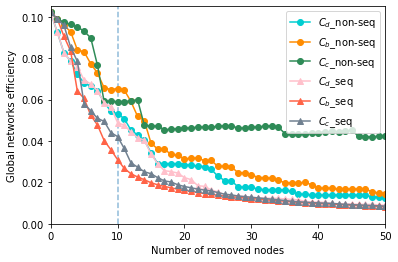

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlabel('Number of removed nodes')
plt.ylabel('Global networks efficiency')
plt.xlim(xmax=50,xmin=0)
plt.ylim(ymax=0.105,ymin=0)

x = range(0,306)

y1 = score_a_1
y2 = score_a_2
y3 = score_a_3
y4 = score_a_4
y5 = score_a_5
y6 = score_a_6

plt.plot([10,10],[0,1],'--',alpha=0.5)

plt.plot(x, y3,'o-', color='#00CED1',label=p_label[2])
plt.plot(x, y1,'o-', color='darkorange',label=p_label[0])
plt.plot(x, y2,'o-', color='seagreen', label=p_label[1])

plt.plot(x, y6,'^-', color='pink', label=p_label[5])
plt.plot(x, y4,'^-', color='tomato',label=p_label[3])
plt.plot(x, y5,'^-', color='slategray', label=p_label[4])

plt.legend()
plt.savefig('Figure1a.png', dpi=600)
plt.show()

In [36]:
print('When 10 nodes are removed from the network, the efficiency decreases by:')
print(str((score_a_1[0]-score_a_3[10])/score_a_1[0]*100)+'%')
print(str((score_a_1[0]-score_a_1[10])/score_a_1[0]*100)+'%')
print(str((score_a_1[0]-score_a_2[10])/score_a_1[0]*100)+'%')
print(str((score_a_1[0]-score_a_6[10])/score_a_1[0]*100)+'%')
print(str((score_a_1[0]-score_a_4[10])/score_a_1[0]*100)+'%')
print(str((score_a_1[0]-score_a_5[10])/score_a_1[0]*100)+'%')

When 10 nodes are removed from the network, the efficiency decreases by:
48.036181915986724%
36.06693668936521%
42.23703716306454%
52.135681128884094%
69.62858306235616%
58.75324892807519%


In [39]:
print('The difference in degree:')
print(str((score_a_1[0]-score_a_6[10])/score_a_1[0]*100-(score_a_3[0]-score_a_3[10])/score_a_1[0]*100)+'%')
print('The difference in betweenness:')
print(str((score_a_1[0]-score_a_4[10])/score_a_1[0]*100-(score_a_3[0]-score_a_1[10])/score_a_1[0]*100)+'%')

The difference in degree:
4.099499212897371%
The difference in betweenness:
33.56164637299095%


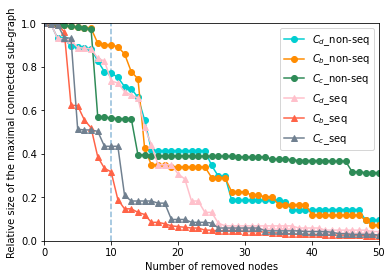

In [41]:
plt.xlabel('Number of removed nodes')
plt.ylabel('Relative size of the maximal connected sub-graph')
plt.xlim(xmax=50,xmin=0)
plt.ylim(ymax=1,ymin=0)

x = range(0,306)

y1 = score_b_1
y2 = score_b_2
y3 = score_b_3
y4 = score_b_4
y5 = score_b_5
y6 = score_b_6

plt.plot([10,10],[0,1],'--',alpha=0.5)

plt.plot(x, y3,'o-', color='#00CED1',label=p_label[2])
plt.plot(x, y1,'o-', color='darkorange',label=p_label[0])
plt.plot(x, y2,'o-', color='seagreen', label=p_label[1])

plt.plot(x, y6,'^-', color='pink', label=p_label[5])
plt.plot(x, y4,'^-', color='tomato',label=p_label[3])
plt.plot(x, y5,'^-', color='slategray', label=p_label[4])


plt.legend()
plt.savefig('Figure1b.png', dpi=600)
plt.show()

In [37]:
print('When 10 nodes are removed from the network, the efficiency decreases by:')
print(str((1-score_b_3[10])*100)+'%')
print(str((1-score_b_1[10])*100)+'%')
print(str((1-score_b_2[10])*100)+'%')
print(str((1-score_b_6[10])*100)+'%')
print(str((1-score_b_4[10])*100)+'%')
print(str((1-score_b_5[10])*100)+'%')

When 10 nodes are removed from the network, the efficiency decreases by:
22.87581699346405%
9.80392156862745%
43.4640522875817%
26.470588235294112%
68.30065359477125%
56.5359477124183%
